In [ ]:
import os
os.environ['KAGGLE_USERNAME']="shiivamsaini"
os.environ['KAGGLE_KEY']="cabfc3cab2483105543eb70de2d29c6f"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
  len(os.listdir('chest_xray/train/NORMAL/')) 

1341

In [ ]:
len(os.listdir('chest_xray/train/PNEUMONIA/'))

3875

In [ ]:
train_path="chest_xray/train/"
test_path="chest_xray/test/"

In [ ]:
import numpy as np
import cv2

In [ ]:
def load_data(path):
  data=[]
  labels=[]
  i=0
  for root,folder,files in os.walk(path):
    for file in files:
      img_path=root+"/"+file
      img=cv2.imread(img_path)
      img=cv2.resize(img,(50,50))
      img=img/255.0
      data.append(img)
      labels.append(i)
    i+=1
  return data,labels


In [ ]:
train_data,train_labels=load_data(train_path)

In [ ]:
 import matplotlib.pyplot as plt

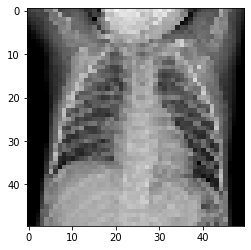

In [ ]:
plt.imshow(train_data[0])

In [ ]:
np.unique(train_labels,return_counts=True)

(array([1, 2]), array([1341, 3875]))

In [ ]:
train_labels=np.asarray(train_labels)
train_data=np.asarray(train_data)

In [ ]:
np.unique(train_labels)

array([1, 2])

In [ ]:
train_labels=np.where(train_labels==1,0,train_labels)
train_labels=np.where(train_labels==2,1,train_labels)


In [ ]:
np.unique(train_labels,return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [ ]:
test_data,test_labels=load_data(test_path)
test_labels=np.asarray(test_labels)
test_data=np.asarray(test_data)
test_labels=np.where(test_labels==1,0,test_labels)
test_labels=np.where(test_labels==2,1,test_labels)



In [ ]:
from sklearn.svm import SVC

In [ ]:
train_updated=train_data.reshape(len(train_data),-1)

In [ ]:
test_updated=test_data.reshape(len(test_data),-1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
sv=SVC()

In [ ]:
np.unique(train_labels)

array([0, 1])

In [ ]:
sv.fit(train_updated,train_labels)

SVC()

In [ ]:
print("Training score",sv.score(train_updated,train_labels))
print("Testing score",sv.score(test_updated,test_labels))

Training score 0.9823619631901841
Testing score 0.7644230769230769


In [ ]:
pred=sv.predict(test_updated)

In [ ]:
pred[0]

1

In [ ]:
train_labels[0]

0

In [ ]:
detected={0:'NORMAL',1:'PNEUMONIA'}

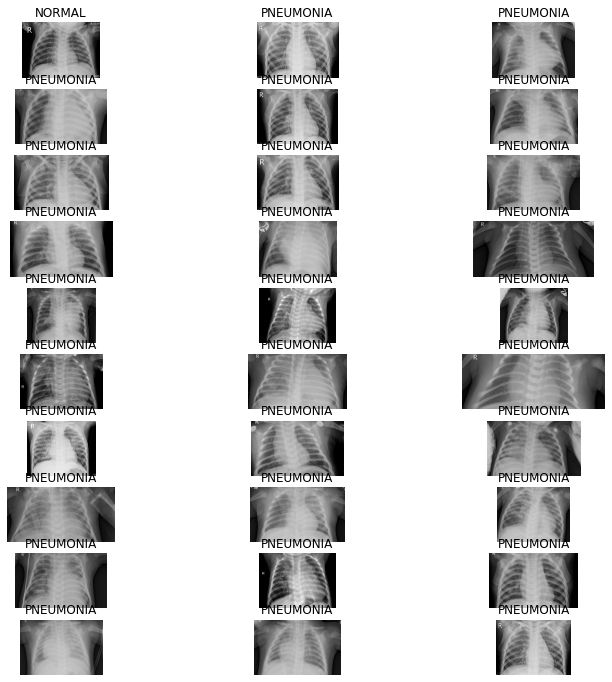

In [ ]:
plt.figure(figsize=(12,12))
p=os.listdir('chest_xray/test/')
c=1
for i in os.listdir('chest_xray/test/PNEUMONIA/')[:30]:
   plt.subplot(10,3,c)
   #rows,column,number

   img=cv2.imread('chest_xray/test/PNEUMONIA/'+i,0)
   img1=cv2.resize(img,(150,50))
   #reshaping single sample
   img1=img1.reshape(1,-1)/255.0
   p=sv.predict(img1)
   plt.title(detected[p[0]])
   plt.imshow(img,cmap='gray')
   plt.axis('off')
   c+=1